Why SVM?
* Can do both linear and non-linear
* Regression or classification or outlier detection
* Good for complex ( high dimensions) but small and medium size datasets

Overfitting solutions
* reducing C - a form of regularizing. Regularization penalized more features - i.e overfitting

Concept of SVM:
* Margins. Maximize the margins or widen the "street"

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import seaborn as sns

%matplotlib inline

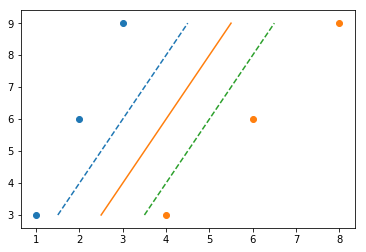

In [16]:
# Illustrate with example

y = np.array([3,6,9])
x = np.array([1,2,3])

plt.scatter(x,y)

y = np.array([3,6,9])
x = np.array([4,6,8])

plt.scatter(x,y)

# The margin is the line that maximizes the smallest "margin" between the two classes
# Something like below

# Plotting the street lanes
y = np.array([3,6,9])
x = np.array([1.5,3,4.5])

plt.plot(x,y,'--')

# Center lane of the street
y = np.array([3,6,9])
x = np.array([2.5,4,5.5])

plt.plot(x,y)

y = np.array([3,6,9])
x = np.array([3.5,5,6.5])

plt.plot(x,y,'--')

# Goal is we want to make the street as wide as possible

However, they are sensitive to feature scaling. Similar to linear regression. Use sklearn StandardScaler for this. similar to what we did during the course

Soft Margin Classification vs Hard Margin Classification.

* Hard margin classification. All classes must be on one side
* Soft margin classification. Some violations are allowed. We use C hyperparamer.

* Ideal, balance between street as large as possible and limiting margin violation

* Use C hyperparameter,  smaller C value >> wider street 



(150, 4)
[ 5.8   3.    4.35  1.3 ]
(150,)
[0 1 2]
(150, 4)
[-0.05250608 -0.1249576   0.33626586  0.13322594]


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

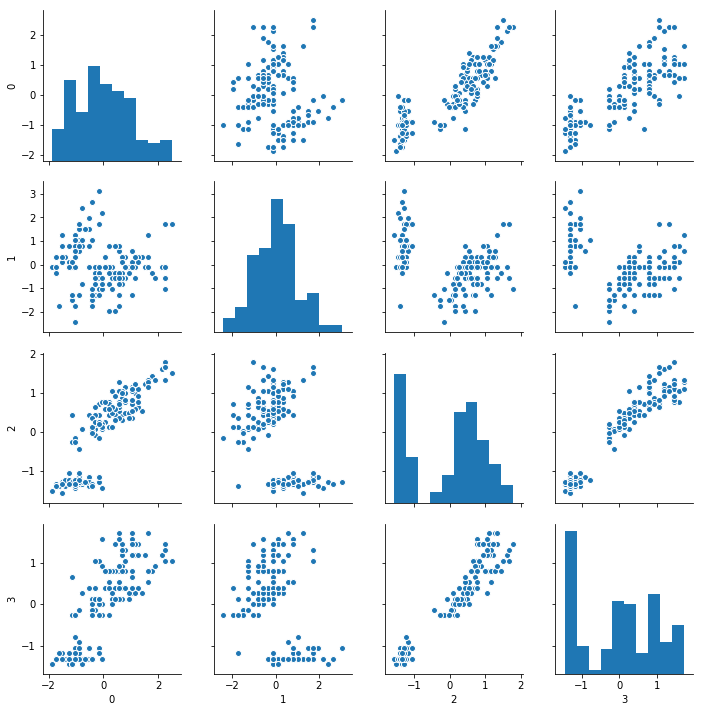

In [48]:
# Example

# 1. Load iris dataset
iris = datasets.load_iris()
x = iris['data']
y = iris['target']

#checks
print(x.shape)
# check to see median and see what scales are
print(np.median(x,axis=0))
print(y.shape)
print(np.unique(y)) # 3 classes

# 2. Scale features
# initialize
scale = StandardScaler().fit(x)
# fit compute mean and std deviation
x_scaled = scale.fit_transform(x)
print(x_scaled.shape)
print(np.median(x_scaled,axis=0))

# maybe we can plot with seaborn too
# ideally we do scatter plot
# see improvement. i.e vector 0 (btw 5 to 8) and vector 3 ( btw 0 and 1)
sns.pairplot(pd.DataFrame(x_scaled))

#sns.pairplot(pd.DataFrame(x))

# Train a linear svm model
# Pipeline works sequentially, it basically calls fit transform. when happens if we want to borrow what it applie
svm_clf = Pipeline((
        ("scaler",StandardScaler()),
        ("linear_svc",LinearSVC(C=1,loss="hinge")),
    ))
#clf = LinearSVC(C=1,loss='hinge')
svm_clf.fit(x,y)
#clf.score()

Note
* SVM do not output probability per class
* Also note difference between LinearSVC and SVC. LinearSVC is a more optimized version
* Linear SVC regularizes the bias term - so we need to center the trainset. We center the train set by subtracting the mean